In [31]:
from tramway.helper.tessellation import *
from tramway.helper.inference import *
from tramway.plot.mesh import plot_delaunay
import matplotlib.pyplot as plt
from scipy.stats import skellam
from scipy.optimize import fmin,minimize

## script main parameters ##

positions_file = '/Users/cvesterg/ownCloud/Random walks/Mapping without tracking/BP_data/Rac1/15_06_2016/reference/c01.txt'
positions_file = '/Users/cvesterg/ownCloud/Random walks/Mapping without tracking/BP_data/MWT_Rac1/4/trajectories.txt'
trajectories_bool=True

tessellation_method = 'hexagon'
# average number of locations per cell
#location_count = 10
# minimum number of locations per cell
#min_location_count = 2
# start and end times to consider for fit
#t_start=1.00; t_end=1.04

# in the same unit as in the trajectory file (here in micrometers)
ref_distance=0.1
localization_error = 0.03
dt=0.04
#jeffreys_prior = False
#diffusivity_smoothing
# keep it low otherwise the inference will take days
max_iter = 100


############################

rwa_file = os.path.splitext(positions_file)[0]+'.rwa'
mesh_label = '{}'.format(tessellation_method) #, location_count, min_location_count)
#maps_label = 'sigma_{}_d_{}_v_{}_j_{:d}'.format(round(localization_error*1e3), diffusivity_smoothing, potential_smoothing, int(jeffreys_prior))

############################

positions_all=load_xyt(positions_file)
if trajectories_bool==True:
    positions_all=positions_all.drop(['n'],axis=1)
else:
    positions_all=positions_all.drop(['t'],axis=1)
    positions_all.columns=(['x','y','t'])
r_t=positions_all
#r_t=r_t.drop(['n'],axis=1)
#r_t.head()
r_t.tail()

,x,y,t
192416,55.842202,37.842150,20.76
192417,56.246002,40.870658,20.72
192418,55.911827,40.626003,20.76
192419,70.994314,21.779736,20.72
192420,70.677462,21.671430,20.76


In [32]:
# ts=np.sort(list(set(r_t['t'])))
# N_t=np.array([len(r_t[r_t['t']==t_].index) for t_ in ts])
# plt.plot(ts,N_t)
# plt.plot(ts[1:-1],N_t[1:-1])
# plt.plot([ts[0],ts[-1]],np.average(N_t[1:-1])*np.ones(2),'k--')
# plt.show()

# Deltas=np.diff(N_t[1:-1])
# plt.plot(ts[2:-1],Deltas)
# plt.show()
# print np.average(Deltas)

In [33]:
# def mlnL_Deltas2(mus_,Deltas_):
#     mu_on=mus_[0]
#     mu_off=mus_[1]
#     return -sum([np.log(skellam.pmf(Delta,mu_on,mu_off)) for Delta in Deltas_])

# mu_on,mu_off=fmin(mlnL_Deltas2,x0=[100.,100.],args=(Deltas,))
# p_off=mu_off/np.average(N_t[1:-1])

# x_D=np.arange(np.floor(min(Deltas)),max(Deltas),1)
# x_D=np.arange(-50,51,1)
# h=5
# bins=np.arange(-50-h/2.,51,h)

# F=plt.figure()
# #F.set_size_inches(3.375*0.5,1.5)
# plt.axes([0.22,0.22,0.74,0.74])
# plt.hist(Deltas,label='Data',bins=bins)
# plt.plot(x_D,h*len(Deltas)*skellam.pmf(x_D,mu_on,mu_off),'r',label='Theory')
# plt.legend(loc=2,frameon=False)
# plt.xlabel(r'$\Delta$',labelpad=2)
# plt.ylabel(r'Count',labelpad=0)
# plt.axis([-50,50,0,100])
# plt.show()

mu_on=96.4809296249 
mu_off=96.4789899237
p_off=0.259937348758

print mu_on,mu_off,p_off

96.4809296249 96.4789899237 0.259937348758


In [34]:
t_start=10.04
t_end=15.04

if t_end==0.0:
    r_t=positions_all
else:
    r_t=positions_all[(positions_all['t']>=t_start)&(positions_all['t']<=t_end)]
#r_t

xlims=(10.,60.)
ylims=(15.,65.)
#xlims=(37.,40.)
#ylims=(37.,40.)
r_t=r_t[(r_t['x']>=xlims[0]) & (r_t['x']<=xlims[1]) & (r_t['y']>=ylims[0]) & (r_t['y']<=ylims[1])]
r_t

,x,y,t
84364,33.446725,17.947299,10.04
84365,33.534704,17.854133,10.08
84366,33.569107,17.907142,10.12
84367,33.531118,17.853422,10.16
84368,33.457274,17.923725,10.20
84369,33.326403,18.034189,10.24
84370,33.428594,17.930208,10.28
84371,33.488974,17.961056,10.32
84372,33.587517,17.995245,10.36
84373,33.274984,17.830914,10.40


In [35]:
ref_distance = 0.5 # [mu]
min_loc_count=0
tessellation_method = 'hexagon'
tessellate(r_t, tessellation_method, ref_distance=ref_distance, min_location_count=0,\
           strict_min_location_count=min_loc_count, output_file=rwa_file,\
           force=True, output_label=mesh_label)


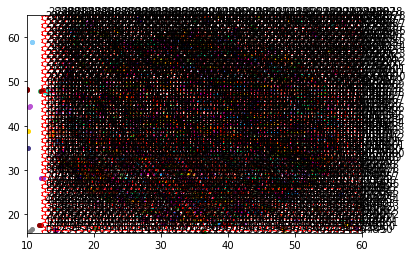

89.4662117958 s


In [36]:
plottime=time()
# cell_plot(rwa_file,output_file='Positions_'+tessellation_method+\
#          ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
#          str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s.png') 
cell_plot(rwa_file, show=True, cell_indices=True)
print time()-plottime, "s"


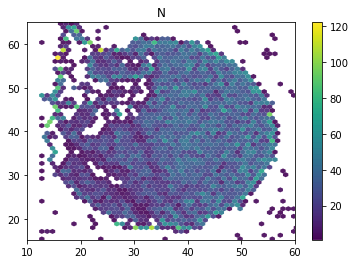

In [37]:
analysis_tree = load_rwa(rwa_file)
cells = analysis_tree[mesh_label].data
map_plot((pd.DataFrame(cells.location_count, columns=['N'])),cells=cells) #,cmap='inferno') 
map_plot((pd.DataFrame(cells.location_count, columns=['N'])),cells=cells,output_file='Location_count,'+tessellation_method+\
         ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
         str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s.png')

In [38]:
runtime=time()
infer(rwa_file, 'nT_test02_hex', new_cell=Locations, dt=0.04, p_off=p_off, mu_on=mu_on,\
        method='NM', tol=1e-2)
print "\n Done!", time()-runtime, "s"


S: 0 0.866025403784 ; total: 0.866025403784 mu^2
Cell no.: 0 ; sum(N): 2 , possible links: 1
Outer cells: sum(N): 0 , possible links: 0
All cells: sum(N): 2 , possible links: 1
[1, 1]
[1, 1]
 final_simplex: (array([[ 0.425 ,  0.0925],
       [ 0.42  ,  0.09  ],
       [ 0.42  ,  0.1   ]]), array([ 7.41317074,  7.41322605,  7.41322605]))
           fun: 7.4131707417703341
       message: 'Optimization terminated successfully.'
          nfev: 25
           nit: 15
        status: 0
       success: True
             x: array([ 0.425 ,  0.0925]) D corrected for motion blur and localization error: 0.54375
0.00869011878967 s

S: 11 0.866025403784 ; total: 0.866025403784 mu^2
Cell no.: 11 ; sum(N): 1 , possible links: 0.0
Outer cells: sum(N): 0 , possible links: 0.0
All cells: sum(N): 1 , possible links: 0.0
[1]
[1]
 final_simplex: (array([[ 0.2  ,  0.2  ],
       [ 0.205,  0.2  ],
       [ 0.2  ,  0.205]]), array([ 0.,  0.,  0.]))
           fun: 0.0
       message: 'Optimization terminate

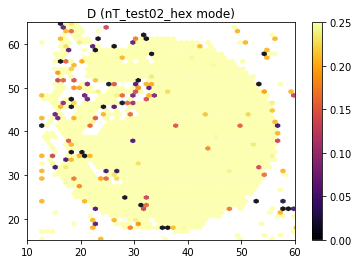

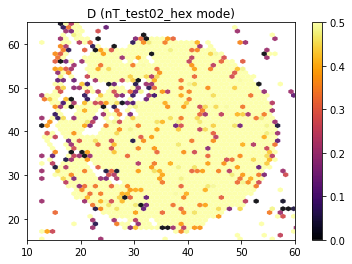

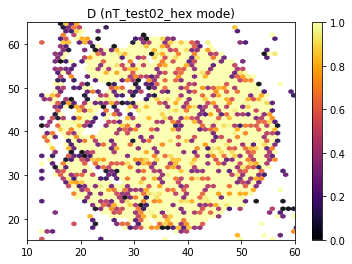

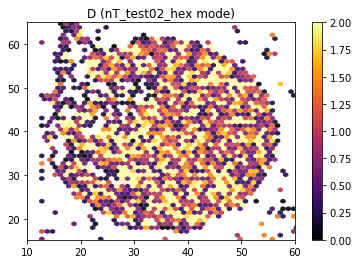

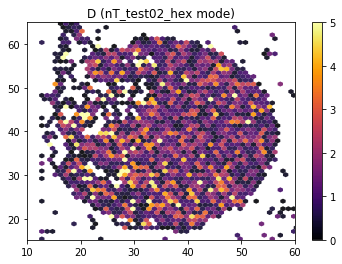

In [39]:
for up_lim in [0.25,0.5,1.,2.,5.]:
    map_plot(rwa_file,cmap='inferno',clim=[0,up_lim], output_file='BP_2zones,'+tessellation_method+\
         ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
         str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s,lim='+str(up_lim)+\
             '.png') 
    map_plot(rwa_file,cmap='inferno',clim=[0,up_lim]) 

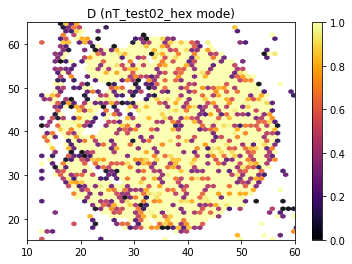

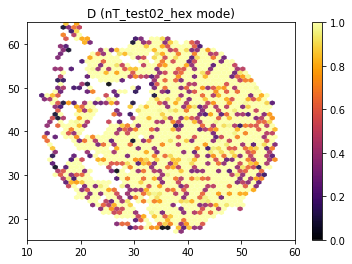

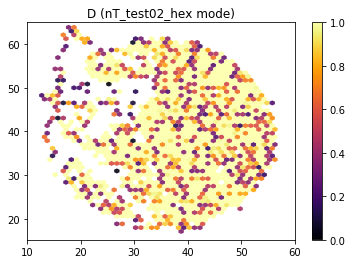

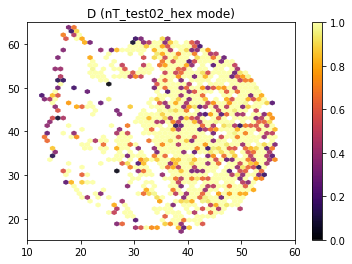

In [40]:
analysis_tree = load_rwa(rwa_file)
cells = analysis_tree[mesh_label].data
maps = analysis_tree[mesh_label][0].data
#maps.maps = maps.maps.loc[5<cells.location_count]

up_lim=1.
for min_loc_count in [0,5,10,20]:
    cells.tessellation.cell_label = min_loc_count<cells.location_count
    map_plot(maps,cells=cells,cmap='inferno',clim=[0,up_lim], output_file='BP_2zones,'+tessellation_method+\
         ',x=['+str(xlims[0])+','+str(xlims[1])+']mum,y=['+str(ylims[0])+','+str(ylims[1])+']mum,'+\
         str(2.*ref_distance)+'mum,t=['+str(t_start)+','+str(t_end)+']s,lim='+str(up_lim)+\
             ',min_count='+str(min_loc_count)+'.png') 
    map_plot(maps,cells=cells,cmap='inferno',clim=[0,up_lim]) 